# Notebook GUI for annotating extracted cells

In [2]:
%matplotlib notebook
# %matplotlib inline
from IPython.display import clear_output

import sys
import os
import numpy as np
import pandas as pd
import glob
import h5py
import time


from scipy.ndimage.filters import median_filter
from ImageStackPy import Img_Viewer as VIEW

import matplotlib.pyplot as plt
import matplotlib as mpl
import tifffile as tiff


from ct_segnet import viewer


from ImageStackPy import ImageProcessing as IP

from ipywidgets import interact
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout
from IPython.display import display, update_display
from ipyfilechooser import FileChooser
from skimage.io import imread

import cv2, os, h5py, collections, sys, math
import numpy as np
import pandas as pd
import tifffile as tiff
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import clear_output
from ipywidgets import interactive
from scipy import ndimage
from scipy.ndimage import label, generate_binary_structure,measurements,morphology 
from scipy.ndimage import binary_erosion, binary_dilation
from skimage import data
from skimage.filters import threshold_otsu


import sys
if '../' not in sys.path:
    sys.path.append('../')

from tools.misc.Utils import CenterSampling, ClusterAnalysis
from tools.misc.patches2d import Patches2D


def text_width(wd):
    return Layout(width = "%ipx"%wd)

In [4]:
def load_channels(obj):
    global base_xrf_img_dir, all_cells
    base_xrf_img_dir=os.path.split(fc.selected_path)[0]
    print(base_xrf_img_dir)
    w_bin_elm.disabled=False
    slider.disabled=False
    
    a=os.path.join(base_xrf_img_dir,w_bin_elm.value)
    a = a + '/*.tif'
    
    all_cells=sorted(glob.glob(a), key=os.path.getmtime) #sort by modification time
    print(len(all_cells))
    
    slider.max=len(all_cells)-1
    

annot_dir='annotated_XRF'
base__dir_path=os.path.join(os.path.join(os.path.dirname(os.getcwd()),annot_dir), 'raw_cells')
print("Extracted cells will be at: ", base__dir_path)  
print('Please open directory for an xrf image and select any tif file from any channel.')
    
tiff_dir = base__dir_path
default_path = tiff_dir 
fc = FileChooser(default_path)
fc.default_filename = '.tif'
w_bin_elm = widgets.Dropdown(options=['Cu','Zn','Ca', 'K', 'P', 'S'], description='Bin. Elm.:', disabled=True)
btn_fc = widgets.Button(description = "Load Channels")
btn_update = widgets.Button(description = "Update channel")

slider = widgets.IntSlider(min=1, max=100, step=1, continuous_update=True, disabled=True)

global fig, ax
global img1,img2


display(HBox(children = [btn_fc, fc]))
display(HBox(children = [btn_update, w_bin_elm]))
display(HBox(children = [slider]))

# fig, ax = plt.subplots(1,figsize=(3,3))


btn_fc.on_click(load_channels)
btn_update.on_click(load_channels)

Extracted cells will be at:  /data02/AZC/AI_XRF/annotated_XRF/raw_cells
Please open directory for an xrf image and select any tif file from any channel.


/data02/AZC/AI_XRF/annotated_XRF/raw_cells/bnp_fly0050_2018_1
110


KeyboardInterrupt: Interrupted by user

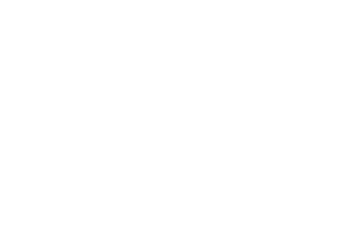

In [17]:
%matplotlib inline

for idx, cell in enumerate(all_cells):
        #     plt.figure(figsize=(8,8))
        #     plt.close()        
            b=tiff.imread(cell)
            print(cell)
            #     tiff.imshow(b)
            plt.imshow(b, interpolation='bicubic');
            plt.colorbar()
            plt.show();
            plt.axis('off');
            

            
#             plt.colorbar(plt.imshow(b, interpolation='bicubic'), location='bottom', orientation='horizontal')
            
#             plt.savefig('Patches/'+ str(idx) +'.jpg', dpi=300)
            clear_output(wait=True)
            choice=input()
            if choice=='n':
                
                reject_path='/data02/AZC/annotated_XRF/reject/'
                patch_filename=reject_path+os.path.split(cell)[1]
#                 print(patch_filename)
                tiff.imsave(patch_filename, b);
            
            if choice=='y':
                
                accept_path='/data02/AZC/annotated_XRF/accept/'
                patch_filename=accept_path+os.path.split(cell)[1]
#                 print(patch_filename)
                tiff.imsave(patch_filename, b);
        
        
            

In [117]:
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
global slider_tool
btn_accept = widgets.Button(description = "Accept", disabled=False)
btn_reject = widgets.Button(description = "Reject", disabled=False)
display(HBox(children = [btn_accept, btn_reject]))

#patchslider in this definition is an int object not a widget so no need to use .value

# def accept(slider_tool):
#     accept_path='/data02/AZC/annotated_XRF/accept/'
#     patch_filename=accept_path+os.path.split(all_cells[slider_tool])[1]
#     print(patch_filename)
#     tiff.imsave(patch_filename,tiff.imread(all_cells[slider_tool]));
    
# def reject(slider_tool):
#     reject_path='/data02/AZC/annotated_XRF/reject/'
#     patch_filename=reject_path+os.path.split(all_cells[slider_tool])[1]
#     print(patch_filename)
#     tiff.imsave(patch_filename, tiff.imread(all_cells[slider_tool]));


def accept(obj):
    accept_path='/data02/AZC/annotated_XRF/accept/'
    patch_filename=accept_path+os.path.split(all_cells[slider_tool])[1]
    print(patch_filename)
    tiff.imsave(patch_filename, b);
    
def reject(obj):
    reject_path='/data02/AZC/annotated_XRF/reject/'
    patch_filename=reject_path+os.path.split(all_cells[slider_tool])[1]
    print(patch_filename)
    tiff.imsave(patch_filename, b);


def update(slider_tool):
    b=tiff.imread(all_cells[slider_tool])
    print(all_cells[slider_tool])
#     tiff.imshow(b)
    plt.imshow(b, interpolation='bicubic');
    plt.show();
    plt.axis('off');
    btn_accept.on_click(accept,'value')
    btn_reject.on_click(reject, 'value')
    
    reject_path='/data02/AZC/annotated_XRF/reject/'
    patch_filename=reject_path+os.path.split(all_cells[slider_tool])[1]
    print(patch_filename)
    tiff.imsave(patch_filename, b);

#     print(slider_tool)
    
    

    plt.tight_layout()


interact(update,slider_tool=widgets.IntSlider(min=0, max=len(all_cells)-1, step=1, value=0));




interactive(children=(IntSlider(value=0, description='slider_tool', max=142), Output()), _dom_classes=('widget…

KeyboardInterrupt: Interrupted by user

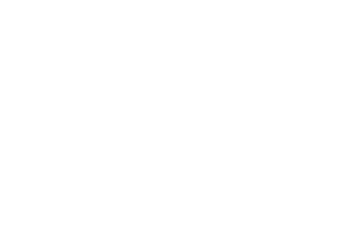

In [125]:
for idx, cell in enumerate(all_cells):
        #     plt.figure(figsize=(8,8))
        #     plt.close()        
            b=tiff.imread(cell)
            print(cell)
            #     tiff.imshow(b)
            plt.imshow(b, interpolation='bicubic');
            plt.show();
            plt.axis('off');
            

            
#             plt.colorbar(plt.imshow(b, interpolation='bicubic'), location='bottom', orientation='horizontal')
            
#             plt.savefig('Patches/'+ str(idx) +'.jpg', dpi=300)
            clear_output(wait=True)
            choice=input()
            if choice=='n':
                
                reject_path='/data02/AZC/annotated_XRF/reject/'
                patch_filename=reject_path+os.path.split(cell)[1]
#                 print(patch_filename)
                tiff.imsave(patch_filename, b);
            
            if choice=='y':
                
                accept_path='/data02/AZC/annotated_XRF/accept/'
                patch_filename=accept_path+os.path.split(cell)[1]
#                 print(patch_filename)
                tiff.imsave(patch_filename, b);
        
        
            

In [98]:
os.path.split(all_cells[0])[1]

'bnp_fly0001_2018_1_Erosion-Dilation_Cu_0.tif'

<IPython.core.display.Javascript object>


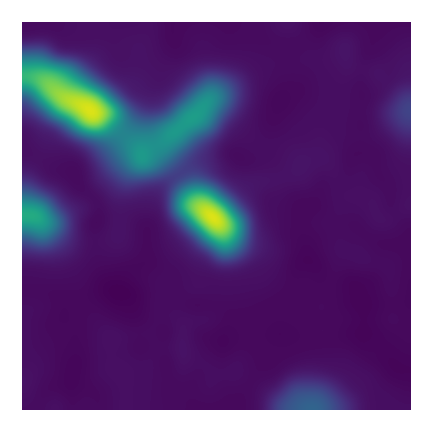

In [113]:
%matplotlib notebook

def on_value_change(change):
    b=tiff.imread(all_cells[0])
#     tiff.imshow(b)
    ax_cell.imshow(b, interpolation='bicubic');
    plt.show();
    plt.axis('off');

slider = widgets.IntSlider(min=1, max=len(all_cells)-1, step=1, continuous_update=True)


slider.observe(on_value_change, 'value')


fig_cell, ax_cell = plt.subplots(1,figsize=(3,3))
widgets.VBox([slider])


